# FINM 367 - TA Review Session 5
Tobias Rodriguez del Pozo

tobiasdelpozo@uchicago.edu

**Note:** For more detail on the CAPM, see Mani's TA review from last week. This session focuses primarily on recap of the CAPM, and the cross-sectional regression.

## 0. Agenda

1. HW5
2. Jupyter Setup
3. Python Fun(?)

## 1. HW5

Recap of linear factor pricing models:

$$
\mathbb{E}[r_i] = \beta_{i,0} + \beta_{i,1}\mathbb{E}[r_{\textrm{mkt}}] + \cdots + \beta_{i,k}\mathbb{E}[r_{k}]
$$

Some important takeaways:
- R^2 does not matter. This follows from:

\begin{align*}
r_i &= \beta_{i,0} + \beta_{i,1}r_{\textrm{mkt}} + \cdots + \beta_{i,k}r_{k} + \epsilon_i \\
\mathbb{E}[r_i] &= \mathbb{E}[\beta_{i,0} + \beta_{i,1}r_{\textrm{mkt}} + \cdots + \beta_{i,k}r_{k} + \epsilon_i] \\
&= \beta_{i,0} + \beta_{i,1}\mathbb{E}[r_{\textrm{mkt}}] + \cdots + \beta_{i,k}\mathbb{E}[r_{k}] + \mathbb{E}[\epsilon_i] \\
&= \beta_{i,0} + \beta_{i,1}\mathbb{E}[r_{\textrm{mkt}}] + \cdots + \beta_{i,k}\mathbb{E}[r_{k}]
\end{align*}

- Intercept *does* matter, note that we still have a $\beta_{i,0}$ term, so this tells us that the intercept is not necessarily zero, and thus measures how poorly the expectations perform.
- You can think of this (in the univariate case) as $\alpha = \bar{r}_i - \beta \bar{r}_{\text{mkt}}$, so exactly the unexplained part of the return (unexplained by the model).

**Note:** 

If CAPM were true, then we would have the following implications:

- Treynor ratio would be the same for every asset, and it would equal the MKT premium.

- The alphas would all be zero

- The Information Ratios would all be zero

Cross-sectional regression:

This is a weird regression! 

The betas are the Xs and the mean returns are the Ys.

$$
\bar{r}_i = \eta_0 + \eta_1\beta_{i,1} + \cdots + \eta_k\beta_{i,k} + \epsilon_i
$$

Note that this doesn't have an expected value, so R^2 does matter here.

What are we actually measuring?

- If the betas are our new $X$'s, and $Y$ is the mean return, then we are stating that the mean return is a linear function of the betas
- The $\eta$ in this case, is how much the mean return changes when the beta changes by 1 unit.
- If returns across many portfolios are driver entirely by beta, in expectation, then these betas should all lie along the same line.

Suppose we have some measurement error. Then, we add an intercept to the regression, to "ignore" the mean level, but rather focus on the slope.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import statsmodels.api as sm

pd.options.display.float_format = '{:,.4f}'.format

sys.path.append('../cmds/')

import TA_utils as ta

plt.style.use('ggplot')

from functools import partial
from collections import defaultdict

read_excel = partial(pd.read_excel, index_col=0, parse_dates=[0], io='../data/factor_pricing_data.xlsx')

factors = read_excel(sheet_name='factors (excess returns)')
portfolios = read_excel(sheet_name='portfolios (excess returns)')

summary = defaultdict(list)

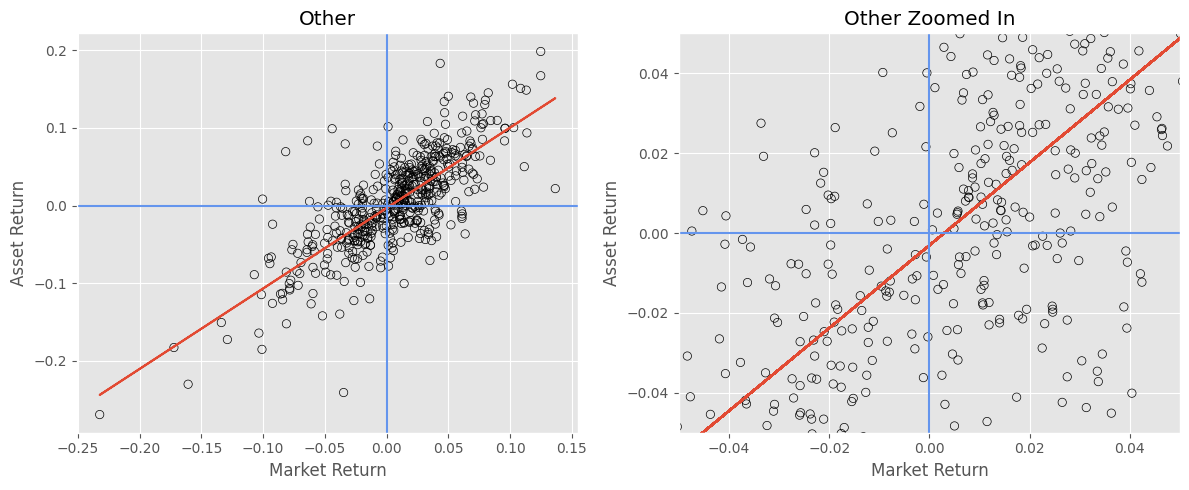

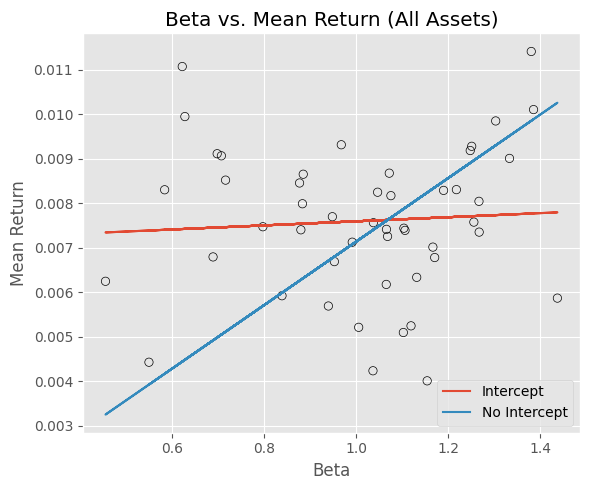

In [4]:
# Under the CAPM...
mkt = sm.add_constant(factors['MKT'])
beta_mkt = []
alpha = []

for asset in portfolios:
    model = sm.OLS(portfolios[asset], mkt, missing='drop')
    results = model.fit()
    beta_mkt.append(results.params['MKT'])
    alpha.append(results.params['const'])
    
# For the current asset, plot the returns vs. the market returns
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

axes[0].scatter(factors['MKT'], portfolios[asset], facecolor='None', edgecolor='k')

# Plot the fitted line
axes[0].plot(factors['MKT'], results.predict(), label='Fitted Line')

# Plot vertical and horizonal lines at origin
axes[0].axhline(0, linestyle='-', color='cornflowerblue')
axes[0].axvline(0, linestyle='-', color='cornflowerblue')

# Title and axis labels
axes[0].set_title(asset)
axes[0].set_xlabel('Market Return')
axes[0].set_ylabel('Asset Return')

# Plot the same thing but zoomed in to the center
axes[1].scatter(factors['MKT'], portfolios[asset], facecolor='None', edgecolor='k')
axes[1].plot(factors['MKT'], results.predict(), label='Fitted Line')
axes[1].axhline(0, linestyle='-', color='cornflowerblue')
axes[1].axvline(0, linestyle='-', color='cornflowerblue')
axes[1].set_xlim(-0.05, 0.05)
axes[1].set_ylim(-0.05, 0.05)
axes[1].set_title(f'{asset} Zoomed In')
axes[1].set_xlabel('Market Return')
axes[1].set_ylabel('Asset Return')

fig.tight_layout()
    
# Plot the betas vs. mean returns for each asset
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(beta_mkt, portfolios.mean(), facecolor='None', edgecolor='k')
ax.set_xlabel('Beta')
ax.set_ylabel('Mean Return')
ax.set_title('Beta vs. Mean Return (All Assets)')

# Fit cross-sectional regression
model = sm.OLS(portfolios.mean(), sm.add_constant(beta_mkt))
results = model.fit()

# Plot the fitted line
ax.plot(beta_mkt, results.predict(), label='Intercept')

# Fit without intercept
model = sm.OLS(portfolios.mean(), beta_mkt)
results = model.fit()

# Plot the fitted line
ax.plot(beta_mkt, results.predict(), label='No Intercept')
ax.legend()
fig.tight_layout()
plt.show()

## 2. Jupyter in browser

What are the problems with vanilla Jupyter?

1. Limited autocompletion
2. Debugging is a pain
3. No easy file explorer
4. No plugins for git, etc.
5. No linting
6. Limited keyboard shortcuts
7. No terminal

Or, at least use the shortcuts to save yourself some time. There are (at least) 3 alternatives to vanilla Jupyter:

1. Jupyter Lab
2. VS Code
3. PyCharm

### 2.1. Shortcuts

All three alternatives have the same shortcuts as Jupyter. There are two "modes" in Jupyter:

1. Command mode: which you get by pressing `Esc`, this lets you add/delete cells, change cell type, etc.
2. Edit mode: which you get by pressing `Enter`, this lets you edit the cell.

Both modes share the same shortcuts for running cells:

| Shortcut | Action |
| --- | --- |
| `Ctrl + Enter` | Run cell |
| `Shift + Enter` | Run cell and select below |
| `Alt + Enter` | Run cell and insert below |

#### 2.1.1. Command mode

| Shortcut | Action |
| --- | --- |
| `a` | Insert cell above |
| `b` | Insert cell below |
| `dd` | Delete cell |
| `m` | Change cell to Markdown |
| `y` | Change cell to Code |
| `Enter` | Enter edit mode |

#### 2.1.2. Edit mode

| Shortcut | Action |
| --- | --- |
| `Ctrl + /` | Comment line |
| `Ctrl + Shift + -` | Split cell |

Standard keyboard shortcuts; eg. option/alt/ctrl/shift + arrow keys to move around and select stuff.


### 2.2. Jupyter Lab

This is a more modern jupyter notebook. It has a debugger, a file explorer, a terminal, and a bunch of other creature comforts available in IDEs. Moreover, many of you have asked about real-time collaboration, which is available in Jupyter Lab, so maybe the FinMath class of 2025 will be able to use it when they take this class.

To install it: `pip install jupyterlab`

To run it: `jupyter lab build`; `jupyter lab`

**Demo time**

### 2.3. VS Code

What I use. Some good shortcuts, too, eg.

- `Cmd + F2 / Cmd + Shift + L` to select all instances of a word and change them all at once.
- `Cmd + D` select next instance of word.
- `Alt + Click` to insert multiple cursors.
- `Cmd + X` without selecting anything to cut the line.
- `Alt + Arrow Keys` to move lines up and down.
- `Alt + Shift + Arrow Keys` to copy lines up and down.
- `Alt + Cmd + Arrow Keys` to add cursors above and below.
- `Cmd + F`/``Cmd + Shift + F` to search in file/project. 
- `Cmd + Shift + P` to open command palette.

### 2.4. PyCharm

You can get PyCharm Professional for free with your UChicago email. I use it less, BUT it is very good for package management and virtual environments. Probably less useful for this class, but for Project Lab it might be useful.

In [4]:
supercalifragilisticexpialidocious = 1
supercalifragilisticexpialidocious = 2
supercalifragilisticexpialidocious = 3

## 3. Python Fun(?)

### 3.1. Everything in Pandas is an Index Operation

If you understand indexes, you understand Pandas.

In [15]:
df_1 = pd.DataFrame(np.random.randn(10, 10))
df_2 = pd.DataFrame(np.random.randn(10, 10))

# This works!
# display(df_1 + df_2)

# This also works!
# df_1[10] = df_2[0]
# display(df_1)

# Why? Because the indices of df_1 and df_2 are the same, so pandas knows how to add them together,
# set one to the other, etc. Now let's change the indices and see what happens.
df_2.index = range(2, 12)

# We can only add where the indices match,
# otherwise we get NaNs.
display(df_1 + df_2)

# The same thing goes for setting
df_1[10] = df_2[0]
# display(df_1)

# So how do we actually fix this problem? There are a few ways.
df_1 = pd.DataFrame(np.random.randn(10, 10))
df_2 = pd.DataFrame(np.random.randn(10, 10))
# df_2.index = range(2, 12)

# First, we reindex df_2 to match df_1.
df_2.index = df_1.index
# display(df_1 + df_2)

# Second, we can use the .add() method, which allows us to specify how we want to handle
# missing values. This will fill in missing values with 0.
# display(df_1.add(df_2, fill_value=0))

# Third, we can reset the index of both dataframes, such that their indices are the same (0,...,9).
df_2 = df_2.reset_index(drop=True)
df_1 = df_1.reset_index(drop=True)
# display(df_1 + df_2)

# Finally, we can use the .align() method, which will align the indices of both dataframes,
# and fill in missing values with NaNs.
df_1, df_2 = df_1.align(df_2, axis=0)
display(df_1 + df_2)

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.9574,-0.1104,-0.2637,-0.8118,-2.0131,0.2438,-1.9861,0.3212,-1.1492,1.5770
3,0.0701,0.4372,-0.3728,-1.9425,0.7330,-4.5447,0.3457,-1.5733,-2.1299,0.1812
4,-0.0604,-1.2340,-0.9900,2.2128,1.0787,1.6631,1.2706,-1.4211,0.9952,0.8517
5,1.2209,-0.2885,-0.6956,-2.4076,-2.0667,2.6221,1.7673,0.1018,1.2163,3.7505
6,-0.4171,-0.0084,1.1932,-1.8434,3.8076,2.5792,0.3690,-0.5292,3.1080,-0.2617
7,1.6845,1.2869,-1.9290,1.6661,0.9204,-0.9321,0.4415,2.2558,-1.4909,-0.1111
8,-0.4468,0.1543,-1.5255,-0.6788,-1.5256,-1.2090,1.8758,1.3252,0.5676,0.8966
9,0.9077,-0.5950,0.9857,1.9288,1.7938,0.8680,-2.0117,1.2095,-1.0770,-0.7037


,0,1,2,3,4,5,6,7,8,9
0,0.0168,-0.0802,2.4071,-0.9288,0.5290,0.5298,-0.0115,0.0114,0.2464,-1.2948
1,2.4860,-0.6926,-0.0192,0.8045,1.7359,0.9326,-0.8428,1.3396,-0.3004,-0.1126
2,-0.7329,1.4167,-2.2429,-0.4607,0.0074,1.1907,-2.7848,1.0895,1.3174,-1.2827
3,-1.1341,-0.1435,1.6733,0.6248,-2.0067,1.4769,-0.6246,-1.7590,-1.9145,-0.2332
4,-1.6660,0.1971,-2.1431,-3.1830,0.2610,-0.2333,-1.7513,1.8852,-0.4858,1.2303
5,-1.3984,0.3825,-0.2699,-2.2101,1.5331,1.4429,-2.2293,-0.6502,1.1955,2.4567
6,0.5972,0.4045,1.6967,-2.3149,-1.6360,0.9343,-1.5257,-0.5874,-1.3671,-0.8288
7,-0.7951,-1.9022,-1.7213,0.2257,-0.7145,-2.7600,0.4522,1.0170,1.2878,1.9870
8,2.8284,-2.5362,-0.2582,0.4637,-0.5621,1.0092,-1.4196,0.0718,-0.6829,0.3296
9,1.5292,-2.0393,1.2072,-1.4630,1.4701,0.7375,0.4695,0.3399,1.4223,-0.3448


![setting](https://files.realpython.com/media/fig-02.494ca4d6f8c3.png)

In [33]:
# And finally, the most common pandas error: SettingWithCopyWarning

data = {"x": 2**np.arange(5), "y": 3**np.arange(5), "z": np.array([45, 98, 24, 11, 64])}
index = ["a", "b", "c", "d", "e"]

# We make a dataframe
df = pd.DataFrame(data=data, index=index)

# We make a mask (so far, so good!)
mask = df["z"] < 50

In [21]:
# Now, note that getting df[mask], returns a *copy* of the dataframe.
# So, we aren't actually setting the values of the original dataframe!
# We're setting the values of a new dataframe called df[mask].
df[mask]["z"] = 0
df

/var/folders/v3/04xd6qbn3s98m1j9c8nkk5_80000gn/T/ipykernel_55859/3835670827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[mask]["z"] = 0


,x,y,z
a,1,1,45
b,2,3,98
c,4,9,24
d,8,27,11
e,16,81,64


In [35]:
# How to fix this?
# 1. Use .loc
df.loc[mask, "z"] = 0

# 2. Use .copy()
df[mask].copy()["z"] = 0

# 3. Use .where()
df["z"] = df["z"].where(~mask, 0)

# A lot of the time, you're probably working with many dfs. 
# In an exam situation; use .copy() until the error goes away, otherwise, use .loc.

### 3.2 Quiz?

In [20]:
from itertools import product
# Where does this go wrong?

capm = sm.add_constant(factors['MKT'])
aqr = sm.add_constant(factors[['MKT', 'HML', 'RMW', 'UMD']])
ff3 = sm.add_constant(factors[['MKT', 'SMB', 'HML']])
ff5 = sm.add_constant(factors[['MKT', 'SMB', 'HML', 'RMW', 'CMA']])

col_names = product(['CAPM', 'AQR', 'FF3', 'FF5'], ['Alpha', 'R^2'])
col_names = list(map(lambda x: ' '.join(x), col_names))

summary = pd.DataFrame(0, index=portfolios.columns, columns=col_names)

models = (['CAPM', 'AQR', 'FF3', 'FF5'], [capm, aqr, ff3, ff5])

for asset in portfolios.columns:
    asset_ret = portfolios[asset]
    for name, X in models:
        model = sm.OLS(asset_ret, X).fit()
        summary.loc[asset, f'{name} Alpha'] = model.params[0]
        summary.loc[asset, f'{name} R^2'] = model.rsquared

summary

,CAPM Alpha,CAPM R^2,AQR Alpha,AQR R^2,FF3 Alpha,FF3 R^2,FF5 Alpha,FF5 R^2
Agric,0.0019,0.3328,0.0008,0.3413,0.0014,0.3575,0.0001,0.3632
Food,0.0042,0.3697,0.0010,0.4711,0.0035,0.4229,0.0002,0.4965
Soda,0.0041,0.2517,0.0016,0.3072,0.0031,0.2791,-0.0000,0.3114
Beer,0.0055,0.3356,0.0020,0.4267,0.0053,0.3682,0.0015,0.4472
Smoke,0.0067,0.1901,0.0029,0.2726,0.0056,0.2376,0.0008,0.3063
Toys,-0.0026,0.4977,-0.0027,0.5103,-0.0028,0.5261,-0.0053,0.5473
Fun,0.0007,0.5981,0.0026,0.6173,0.0005,0.6121,0.0015,0.6168
Books,-0.0013,0.6551,-0.0025,0.6897,-0.0023,0.6932,-0.0039,0.7061
Hshld,0.0019,0.4947,-0.0005,0.5603,0.0017,0.5135,-0.0017,0.5885
Clths,0.0006,0.5691,-0.0010,0.6318,-0.0000,0.5849,-0.0029,0.6418


In [19]:
next(models)

StopIteration: 

In [ ]:
# Answer:

models = [*zip(['CAPM', 'AQR', 'FF3', 'FF5'], [capm, aqr, ff3, ff5])]

In [12]:
# Hackerrank uses print(); so remember to make sure you know the difference 
# between a printed series and a printed one-column dataframe!
df = pd.DataFrame([1, 2, 3, 4, 5], columns=['A'])
print(df)
print('-'*10)
print(df['A'])

   A
0  1
1  2
2  3
3  4
4  5
----------
0    1
1    2
2    3
3    4
4    5
Name: A, dtype: int64


In [13]:
# Miscellanous stuff

# Suppose we want to count the number of times each letter appears in a string and get the most common 5.
# We could do:
x = 'iasodjiapdiopajopqijweioqnewopijwe'

count = {}

for i in x:
    if i in count:
        count[i] += 1
    else:
        count[i] = 1
        
# Ugly!
dict(sorted(count.items(), key=lambda x: x[1], reverse=True)[:5])

{'i': 6, 'o': 5, 'j': 4, 'p': 4, 'a': 3}

In [14]:
# A default dict could save us some time.
from collections import defaultdict

count = defaultdict(int)

for i in x:
    count[i] += 1
    
# Still ugly :(
dict(sorted(count.items(), key=lambda x: x[1], reverse=True)[:5])

{'i': 6, 'o': 5, 'j': 4, 'p': 4, 'a': 3}

In [15]:
# Counter to the rescue!
from collections import Counter

dict(Counter(x).most_common(5))

{'i': 6, 'o': 5, 'j': 4, 'p': 4, 'a': 3}

### 3.3 Iterators and Generators

In [24]:
# An iterator is an object that can be looped over.
# They key benefit of iterators and generators is that they are lazy, meaning that they
# only compute the next value when it is needed.

# Iterator example
class Foo:
    def __init__(self) -> None:
        self.x = 0
    
    def __iter__(self):
        
        return self
    
    def __next__(self):
        self.x += 1
        if self.x > 10:
            raise StopIteration
        return self.x
    
foo = Foo()
for i in foo:
    print(i)

1
2
3
4
5
6
7
8
9
10


In [17]:
# What happens if I try to force it?
next(foo)

StopIteration: 

In [18]:
# Vs. a generator, which is a way to create an iterator with a function.
# My favorite, and most elegant way to do this is with complicated concatenation of dataframes.

def dataframe_generator():
    for i in range(10):
        # Pretend this code gets data from a database, or something
        yield pd.DataFrame(np.random.randn(2, 2))
        
# You could have something like
dfs = [i for i in dataframe_generator()]
pd.concat(dfs)
pd.concat(dataframe_generator());